# Preamble

To use spacemathpy we can consider two ways, symbolic and numeric definitions of Higgs couplings. 

## Symbolic approach

To do symbolic calculations we should use [sympy](https://www.sympy.org/en/index.html) library, for example we can use any funtion from sympy using the next one lines of commands:

In [27]:
import sympy as sp #import sympy
sp.init_printing() # pretty latex printer activation
sp.sqrt(4)

where we have used square root function of sympy library. Also we can work with symbolic variables with

In [28]:
xsym = sp.symbols('x')#
sp.sqrt(xsym)

## Numeric Approach

To numeric function we choose [numpy](https://numpy.org/) library, then, we can use square root of numpy library as follow

In [29]:
import numpy as np #import numpy
np.sqrt(4.0)

the main advantage of numpy is that work in a vectorial way, 

In [30]:
xnp = np.array([4.0,9.0,16.0])
np.sqrt(xnp)

array([2., 3., 4.])

In the above example the square root have been calculated over each component of `xnp` `np.array`. 

## Joining symbolic and numeric approaches

In principle, to work with spacemathpy we only need define a numeric version of our Higgs couplings, but if we can see our expressions is convenient to also define the symbolic version. To define both kinds of function, we do use `issymbolic` function defined in spacemathpy, which return `True` if someone of its arguments are sympy symbols(instances of `sp.symbols` function) or `False` otherwise. The next one is a example of this approach

In [31]:
from spacemathpy import * #import all functions of spacemathpy

In [32]:
?issymbolic

Signature: issymbolic(*args)
Docstring:
Test is some of the element of args list is an 
instance of sympy

Parameters
----------
args: list
    This argument is a list with differents types of
    elements they could be float, int or sympy instances
    
Returns
-------
Return True if someone of the elements of args list is a
sympy instance, otherwise return False.
File:      ~/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py
Type:      function


In [33]:
def square_root(x):
    if issymbolic(x):
        return sp.sqrt(x)
    else:
        return np.sqrt(x)


The above function works well with numeric and symbolic approaches, for example

In [34]:
square_root(xsym)

In [35]:
square_root(xnp)

array([2., 3., 4.])

## Predefined constants

To other side,spacemathpy have some global variables predefined, for example masses to $t$,$b$, $\tau$, $W$ and $Z$ particles are defined as a python dictionary as we can see in the next example

In [36]:
mW

{'value': 80.379, 'units': 'GeV', 'symbol': m_W}

so, if we need a numeric value we use

In [37]:
mW['value']

for symbolic representation we use

In [38]:
mW['symbol']

Also, constants like $g$ and $v$ (SM vev) are given by `g` and `SMvev` as we see above

In [39]:
g

{'value': 0.6534878048780488, 'unit': None, 'symbol': g}

In [40]:
SMvev

{'value': 246, 'units': 'GeV', 'symbol': v}

For a correct implementation of Higgs couplings we need use the predifined masses and constants. As an example, we can define Higgs coupling to top quarks in SM as follow

In [42]:
ghtt_SM = mt['symbol']/SMvev['symbol']
ghtt_SM

Also, we have defined a function called numeric_substitutions which evaluate the numeric values to the constants predefined in spacemathpy

In [44]:
ghtt_SM.subs(numeric_substitutions('All'))

## Plotting

In [22]:
import matplotlib.pyplot as plt #import matplotlib.pyplot 
%matplotlib inline

We can plot our functions with matplotlib library. To plot we need use numpy `np.array` as follow

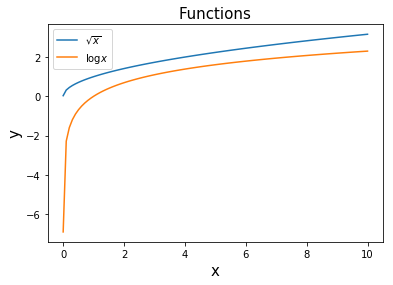

In [23]:
X = np.linspace(0.001,10,100)#range x np.array
plt.plot(X,square_root(X),label=r'$\sqrt{x}$');#Plot 1
plt.plot(X,np.log(X),label=r'$\log{x}$')#Plot 2 
plt.xlabel('x',fontsize=15);#x label
plt.ylabel('y',fontsize=15);#y label
plt.legend();#To show legends
plt.title('Functions',fontsize=15);#Title

## Pandas usage

`DataFrame` pandas method is used in spacemathpy, consider de next code

In [24]:
import pandas as pd

In [25]:
x = np.linspace(0.01,1,10)
y1 = np.sqrt(x)
y2 = np.log(x)
data = {'x':x,'sqrt(x)':y1,'log(x)':y2}
df = pd.DataFrame(data)
df

,x,sqrt(x),log(x)
0,0.01,0.100000,-4.605170
1,0.12,0.346410,-2.120264
2,0.23,0.479583,-1.469676
3,0.34,0.583095,-1.078810
4,0.45,0.670820,-0.798508
5,0.56,0.748331,-0.579818
6,0.67,0.818535,-0.400478
7,0.78,0.883176,-0.248461
8,0.89,0.943398,-0.116534
9,1.00,1.000000,0.000000


if we want a specific column of the above table (`DataFrame`) we run 

In [19]:
df['sqrt(x)']

0    0.100000
1    0.346410
2    0.479583
3    0.583095
4    0.670820
5    0.748331
6    0.818535
7    0.883176
8    0.943398
9    1.000000
Name: sqrt(x), dtype: float64

which is compatible with matplotlib, the we can plot `'sqrt(x)'` and `'log(x)'` columns versus `'x'` column if we use

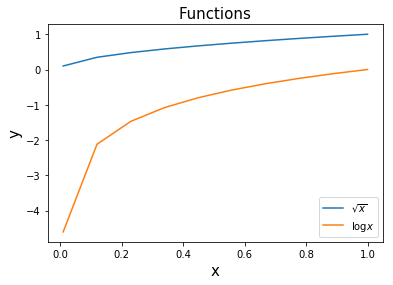

In [20]:
plt.plot(df['x'],df['sqrt(x)'],label=r'$\sqrt{x}$');#Plot 1
plt.plot(df['x'],df['log(x)'],label=r'$\log{x}$')#Plot 2 
plt.xlabel('x',fontsize=15);#x label
plt.ylabel('y',fontsize=15);#y label
plt.legend();#To show legends
plt.title('Functions',fontsize=15);#Title
plt.savefig('pandas-plot.png',dpi=500)

## Higgs Signal Strengths

spacemathpy library has the next Higgs signals defined

In [16]:
Rb

Higgs Signal streght observable with bounds: 0.87 < Rb <1.17 at 1 sigma and 0.72 < Rb< 1.32 at 2 sigma.

In [18]:
Rtau

Higgs Signal streght observable with bounds: 0.94 < Rtau <1.28 at 1 sigma and 0.77 < Rtau< 1.45 at 2 sigma.

In [19]:
Rgamma

Higgs Signal streght observable with bounds: 1.00496 < Rgamma <1.19504 at 1 sigma and 0.909912 < Rgamma< 1.29009 at 2 sigma.

In [20]:
Rw

Higgs Signal streght observable with bounds: 0.909902 < Rw <1.2501 at 1 sigma and 0.739804 < Rw< 1.4202 at 2 sigma.

In [21]:
Rz

Higgs Signal streght observable with bounds: 1.07496 < Rz <1.30504 at 1 sigma and 0.959928 < Rz< 1.42007 at 2 sigma.

To applications to 2HDM see the `Examples` folder.